In [52]:
#scale the data
#initialize centroids
#label each data point
#plot the centroids
#repeat 3-5 until centroids stops changing

In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import in neede libraries

In [54]:
best_pose = pd.read_csv("best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv")
#I used last semeters best_pose data

In [55]:
best_pose.head()
#checked to see the beginning of the data and its variables

,Unnamed: 0,time,heightStdDev,longitudeStdDev,groupMetadataID,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution
0,0,1.694450e+18,0.030676,0.012783,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.012411,1.0,-82.135228,NARROW_INT,0.0,SOL_COMPUTED,39.378104,14
1,0,1.694450e+18,0.218763,0.136896,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.080366,1.0,-82.143940,NARROW_INT,0.0,SOL_COMPUTED,39.382745,10
2,1,1.694450e+18,0.027027,0.013242,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.015331,1.0,-82.114507,NARROW_INT,0.0,SOL_COMPUTED,39.329850,13
3,0,1.694450e+18,0.021111,0.010912,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.011871,1.0,-82.127983,NARROW_INT,0.0,SOL_COMPUTED,39.330354,15
4,0,1.694450e+18,0.019266,0.008685,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.010546,1.0,-82.105102,NARROW_INT,0.0,SOL_COMPUTED,39.320441,15


In [56]:
features = [ "latitude", "longitude", "latitudeStdDev", "longitudeStdDev", "numSatsInSolution" ]
#created a selection on variables/column that I believed were important and wanted to use

In [57]:
best_pose = best_pose.dropna(subset=features)
#deleted any na or missing values, I believe that this dataset had none (would not do this again, since all data is deemed as important)

In [58]:
data = best_pose[features].copy()
#creates a copy of the original data with on the subset features and columns I wanted 

In [59]:
data
#show the data

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,39.378104,-82.135228,0.012411,0.012783,14
1,39.382745,-82.143940,0.080366,0.136896,10
2,39.329850,-82.114507,0.015331,0.013242,13
3,39.330354,-82.127983,0.011871,0.010912,15
4,39.320441,-82.105102,0.010546,0.008685,15
...,...,...,...,...,...
2006,39.323621,-82.104320,0.014480,0.022711,8
2007,39.330300,-82.127426,0.008630,0.007843,16
2008,39.327638,-82.103031,0.137115,0.455607,8
2009,39.372002,-82.133260,0.013364,0.011439,13


In [60]:
data = ((data - data.min())/(data.max()-data.min())) * 9 + 1
#minimize the data to be able to ensure no column is prioritized over another.

In [61]:
data.describe()
#you can see that my minimum is now 1 and maximum is now 10

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,4.632214,5.199444,1.029901,1.022175,7.209466
std,2.912224,2.952936,0.235410,0.216398,1.397867
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.309657,2.850283,1.001017,1.000741,6.294118
50%,3.159102,4.041927,1.001876,1.001255,7.352941
75%,7.557323,8.744057,1.003664,1.002507,8.411765
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [62]:
data.head()

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,8.719437,2.917401,1.001490,1.001189,8.411765
1,9.325602,1.101069,1.028005,1.031030,6.294118
2,2.417374,7.237325,1.002629,1.001299,7.882353
3,2.483260,4.427697,1.001279,1.000739,8.941176
4,1.188602,9.197942,1.000762,1.000204,8.941176


In [63]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
#a function that will take in the number of clusters we want with our data
#initialize a list called centroids for i in range k
#then add it to the list of centroids
#the number of centroids is equivalent to the number of clusters we want
#combines all of the centroids(individual pandas series) into a data frame

In [64]:
centroids = random_centroids(data,5)
#we can now run the random_centroids

/tmp/ipykernel_15551/973749533.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [65]:
centroids

,0,1,2,3,4
latitude,2.035999,7.121598,2.476147,9.295742,2.531501
longitude,3.784336,9.999283,6.972054,4.089022,2.762063
latitudeStdDev,1.011060,1.001355,1.003589,1.041783,1.001916
longitudeStdDev,1.002251,1.000267,1.000888,1.001707,1.001313
numSatsInSolution,6.823529,6.294118,5.235294,7.352941,8.411765


In [66]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
#label each data point 
#finds the euclidean distance between a data point and each cluster for all centroids 
#finding which cluster center is closest to that point 

In [67]:
labels = get_labels(data, centroids)

In [68]:
labels.value_counts()
#how many times each value occurs 

2    718
3    713
4    392
0    188
Name: count, dtype: int64

In [69]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
#splits the data by each cluster and then calculate a new center for each group

In [70]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
#Using PCA to change the multidimensional values into 2-D data
#Pass in the several column data and get it converted into 2 column data
#plotting the clusters and coloring from the plotting of centroids 
#will wait and change the graph over the already completed graph 

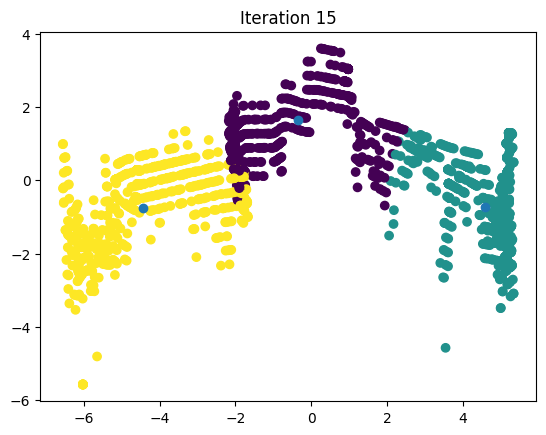

In [71]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
#when new centroids are equilavent to past centroids (indicates that it has stopped shifting)
#update the data to see which label corresponds with each cluster

In [72]:
centroids

,0,1,2
latitude,3.405742,1.883472,8.248610
longitude,3.512731,8.899471,2.526213
latitudeStdDev,1.002607,1.009828,1.051143
longitudeStdDev,1.001691,1.009508,1.037044
numSatsInSolution,7.566524,6.646864,6.987196


In [73]:
labels.value_counts()

1    703
2    688
0    620
Name: count, dtype: int64

In [74]:
best_pose[labels == 0][["groupMetadataID"] + features]

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
3,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.330354,-82.127983,0.011871,0.010912,15
6,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.347344,-82.138009,0.018256,0.018749,11
7,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.330219,-82.127662,0.009353,0.009680,15
8,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.330382,-82.128021,0.012225,0.011417,15
9,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.341091,-82.136639,0.017045,0.030917,8
...,...,...,...,...,...,...
1993,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.331269,-82.129125,0.011002,0.009822,16
1995,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.351266,-82.134998,0.011722,0.013480,12
1996,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.349939,-82.136141,0.018050,0.026691,11
1997,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.336424,-82.135444,0.016646,0.021515,11


In [75]:
best_pose[labels == 5][["groupMetadataID"] + features]
#shows the data in which cluster they are in, hence there is no cluster 5

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution


In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [78]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
latitude,8.500875,1.938196,3.769566
longitude,2.644662,8.964958,3.696952
latitudeStdDev,1.079587,1.010735,1.002724
longitudeStdDev,1.057106,1.010027,1.001682
numSatsInSolution,7.287387,6.765377,7.598739


In [79]:
from sklearn.cluster import KMeans